In [1]:
import pandas as pd
df = pd.read_excel('Sample_Data_1.xlsx')

In [151]:
df.head(3)

,Fam. No.,Publication no,Current assignees,Player Type,XX Rating,Sub-component,Uniqueness,Impact/Benefit,AC/DC Motor,Phase,...,Motor Position,Family legal status,Geography Count,Cit Count,Claim Count,Priority Country,Overall Rating,Inventors,Earliest priority date,Application dates
0,1,Reference9,BYD,OEM,5,MOTOR COOLING,Oil-cooled cooling system | Spraying device,Improved cooling | Compact,NaN,NaN,...,NaN,GRANTED,1,0,1,CN,3.20,WANG JIANXIN\nZOU XIAOSONG\nFANG ZHAOXIANG,2019-04-15,2019-04-15
1,2,Reference10,BYD,OEM,5,MOTOR CASING,Water-cooled cooling device,Compact,NaN,NaN,...,NaN,PENDING,1,5,1,CN,2.85,WANG JIANXIN\nZOU XIAOSONG\nFANG ZHAOXIANG,2019-04-15,2019-04-15
2,3,Reference330,NIDEC,Suplier,5,Winding,Hairpin windings,Improved Cooling,AC,NaN,...,NaN,GRANTED,2,5,1,FR,3.20,LENOIR ROMARIC ([FR])\nBONNET VINCENT ([FR]),2019-10-31,2020-10-14


In [154]:
x=df.groupby(['Current assignees'])['Sub-component'].sum()

In [158]:
x

Current assignees
BORGWARNER                                                          STATOR
BYD                      MOTOR COOLINGMOTOR CASINGMOTOR CASINGSTATOR WI...
CONTINENTAL                                             MOTOR COOLINGROTOR
DAIMLER                  STATORROTOR CORE | STATOR COREWINDINGSSTATORMO...
DANA                        MOTOR COOLINGSTATOR WINDINGMOTOR COOLINGSTATOR
DENSO  |TOYOTA                                                      STATOR
FAW                                                      ROTORMOTOR CASING
FORD                     STATOR WINDINGROTORMOTOR WINDINGROTORMOTOR WIN...
GM                                                                   Rotor
HITACHI                  MOTOR CASINGMOTOR CASINGSTATORSTATORROTORMOTOR...
HONDA MOTOR              MOTOR WINDINGMOTOR COOLINGMOTOR COOLINGMOTOR C...
HONDA MOTOR  |HITACHI                                        MOTOR COOLING
HYUNDAI                                                      MOTOR COOLING
HYUNDAI

In [155]:
for i in x:
    print(i)

STATOR
MOTOR COOLINGMOTOR CASINGMOTOR CASINGSTATOR WINDINGMOTOR CASINGMOTOR CASINGSTATORSTATOR WINDING
MOTOR COOLINGROTOR
STATORROTOR CORE | STATOR COREWINDINGSSTATORMOTOR COOLINGROTORSTATORMOTOR COOLINGSTATOR 
MOTOR COOLINGSTATOR WINDINGMOTOR COOLINGSTATOR
STATOR
ROTORMOTOR CASING
STATOR WINDINGROTORMOTOR WINDINGROTORMOTOR WINDINGSTATORSTATORSTATORMOTOR WINDINGSTATOR
Rotor
MOTOR CASINGMOTOR CASINGSTATORSTATORROTORMOTOR WINDINGROTOR COREMOTOR COOLINGMOTOR CONTROLMOTOR COOLING
MOTOR WINDINGMOTOR COOLINGMOTOR COOLINGMOTOR CONTROLMOTOR COOLINGSTATOR ROTORMOTOR COOLINGMOTOR CONTROLOUTPUT SHAFTROTOR MAGNETMOTOR COOLINGMOTOR COUPLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGSTATORSTATORMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR CONTROLMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR COOLINGROTOR MAGNETSTATORMOTOR CONTROL
MOTOR COOLING
MOTOR COOLING
STATOR MOTOR COOLINGMOTOR COOLINGMOTOR COOLINGMOTOR BEARING

In [162]:
df.groupby(['Current assignees'])['Sub-component'].value_counts()

Current assignees      Sub-component           
BORGWARNER             STATOR                       1
BYD                    MOTOR CASING                 4
                       STATOR WINDING               2
                       MOTOR COOLING                1
                       STATOR                       1
CONTINENTAL            MOTOR COOLING                1
                       ROTOR                        1
DAIMLER                STATOR                       3
                       MOTOR COOLING                2
                       ROTOR                        1
                       ROTOR CORE | STATOR CORE     1
                       STATOR                       1
                       WINDINGS                     1
DANA                   MOTOR COOLING                2
                       STATOR                       1
                       STATOR WINDING               1
DENSO  |TOYOTA         STATOR                       1
FAW                    MOTOR CASIN

In [164]:
temp=df[['Current assignees','Sub-component']]

In [167]:
x=temp.pivot_table(index='Current assignees',columns='Sub-component',aggfunc=len,fill_value=0)

<AxesSubplot:xlabel='Sub-component', ylabel='Current assignees'>

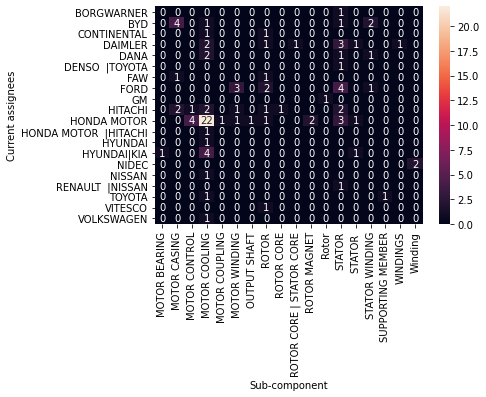

In [168]:
sns.heatmap(x,annot=True)

In [152]:
df.pivot(index='Current assignees',columns='Sub-component')

ValueError: Index contains duplicate entries, cannot reshape

In [3]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [4]:
df.rename(columns = {'Phase ':'Phase'}, inplace = True)

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fam. No.                100 non-null    int64         
 1   Publication no          100 non-null    object        
 2   Current assignees       100 non-null    object        
 3   Player Type             100 non-null    object        
 4   XX Rating               100 non-null    int64         
 5   Sub-component           100 non-null    object        
 6   Uniqueness              100 non-null    object        
 7   Impact/Benefit          100 non-null    object        
 8   AC/DC Motor             23 non-null     object        
 9   Phase                   31 non-null     object        
 10  MOTOR Type              19 non-null     object        
 11  Winding config          1 non-null      object        
 12  Hairpin                 8 non-null      object     

In [7]:
df.isnull().sum()

Fam. No.                   0
Publication no             0
Current assignees          0
Player Type                0
XX Rating                  0
Sub-component              0
Uniqueness                 0
Impact/Benefit             0
AC/DC Motor               77
Phase                     69
MOTOR Type                81
Winding config            99
Hairpin                   92
Flux                      98
Cooling Passage           85
Coolant guide             96
Cooling Type              52
Motor Position            83
Family legal status        0
Geography Count            0
Cit Count                  0
Claim Count                0
Priority Country           0
Overall Rating             0
Inventors                  0
Earliest priority date     0
Application dates          0
dtype: int64

In [9]:
df.shape

(100, 27)

In [10]:
df.dtypes

Fam. No.                           int64
Publication no                    object
Current assignees                 object
Player Type                       object
XX Rating                          int64
Sub-component                     object
Uniqueness                        object
Impact/Benefit                    object
AC/DC Motor                       object
Phase                             object
MOTOR Type                        object
Winding config                    object
Hairpin                           object
Flux                              object
Cooling Passage                   object
Coolant guide                     object
Cooling Type                      object
Motor Position                    object
Family legal status               object
Geography Count                    int64
Cit Count                          int64
Claim Count                        int64
Priority Country                  object
Overall Rating                   float64
Inventors       

In [11]:
df.describe()

,Fam. No.,XX Rating,Geography Count,Cit Count,Claim Count,Overall Rating
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.340000,2.270000,5.390000,1.610000,2.803500
std,29.011492,0.535978,1.117853,5.086911,0.851558,0.326541
min,1.000000,3.000000,1.000000,0.000000,1.000000,2.050000
25%,25.750000,3.000000,1.000000,1.000000,1.000000,2.600000
50%,50.500000,3.000000,2.000000,5.000000,1.000000,2.750000
75%,75.250000,4.000000,3.000000,8.000000,2.000000,3.050000
max,100.000000,5.000000,6.000000,24.000000,4.000000,3.600000


In [12]:
df.columns

Index(['Fam. No.', 'Publication no', 'Current assignees', 'Player Type',
       'XX Rating', 'Sub-component', 'Uniqueness', 'Impact/Benefit',
       'AC/DC Motor', 'Phase', 'MOTOR Type', 'Winding config', 'Hairpin',
       'Flux', 'Cooling Passage', 'Coolant guide', 'Cooling Type',
       'Motor Position', 'Family legal status', 'Geography Count', 'Cit Count',
       'Claim Count', 'Priority Country', 'Overall Rating', 'Inventors',
       'Earliest priority date', 'Application dates'],
      dtype='object')

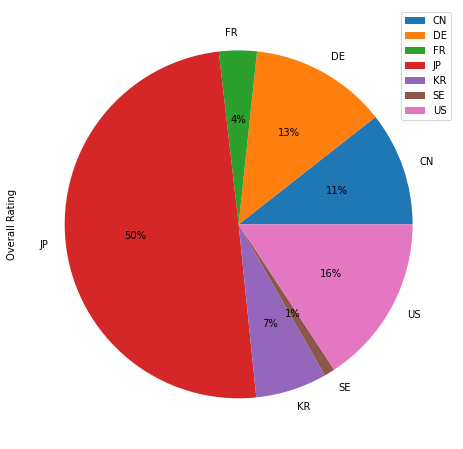

In [9]:
df.groupby(['Priority Country']).sum().plot(kind='pie', y='Overall Rating', autopct='%1.0f%%')

import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig('test2png.png', dpi=100)

Enter Current assigneesHONDA MOTOR


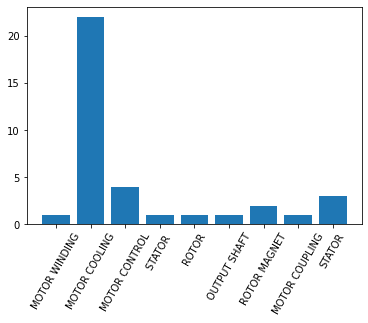

In [10]:
x=input('Enter Current assignees')
if (df['Current assignees'] == 'HONDA MOTOR').any() :
        hm=df[(df['Current assignees'] == 'HONDA MOTOR')]["Sub-component"]
        hm = hm.tolist()
        y={}
        for i in hm:
            y[i]=hm.count(i)
        plt.bar(range(len(y)), list(y.values()), align='center')
        plt.xticks(range(len(y)), list(y.keys()))

        plt.xticks(rotation=60)
        plt.show()

In [30]:
df['Current assignees'].value_counts()

HONDA MOTOR              36
HITACHI                  10
FORD                     10
DAIMLER                   9
BYD                       8
HYUNDAI|KIA               6
DANA                      4
TOYOTA                    2
NIDEC                     2
CONTINENTAL               2
FAW                       2
HONDA MOTOR  |HITACHI     1
VOLKSWAGEN                1
HYUNDAI                   1
BORGWARNER                1
GM                        1
VITESCO                   1
NISSAN                    1
DENSO  |TOYOTA            1
RENAULT  |NISSAN          1
Name: Current assignees, dtype: int64

In [34]:
df['Sub-component'].value_counts()

MOTOR COOLING               39
STATOR                      17
ROTOR                        8
MOTOR CASING                 7
MOTOR WINDING                5
MOTOR CONTROL                5
STATOR WINDING               4
STATOR                       3
Winding                      2
ROTOR MAGNET                 2
Rotor                        1
WINDINGS                     1
MOTOR COUPLING               1
OUTPUT SHAFT                 1
ROTOR CORE                   1
MOTOR BEARING                1
ROTOR CORE | STATOR CORE     1
SUPPORTING MEMBER            1
Name: Sub-component, dtype: int64

## HONDA MOTOR

In [11]:
y

{'MOTOR WINDING': 1,
 'MOTOR COOLING': 22,
 'MOTOR CONTROL': 4,
 'STATOR ': 1,
 'ROTOR': 1,
 'OUTPUT SHAFT': 1,
 'ROTOR MAGNET': 2,
 'MOTOR COUPLING': 1,
 'STATOR': 3}

## HITACHI

In [17]:
hm=df[(df['Current assignees'] == 'HITACHI')]["Sub-component"]
hm = hm.tolist()
h={}
for i in hm:
    h[i]=hm.count(i)
h

{'MOTOR CASING': 2,
 'STATOR': 2,
 'ROTOR': 1,
 'MOTOR WINDING': 1,
 'ROTOR CORE': 1,
 'MOTOR COOLING': 2,
 'MOTOR CONTROL': 1}

In [29]:
a= pd.DataFrame(h.items())
a

,0,1
0,MOTOR CASING,2
1,STATOR,2
2,ROTOR,1
3,MOTOR WINDING,1
4,ROTOR CORE,1
5,MOTOR COOLING,2
6,MOTOR CONTROL,1


## FORD

In [18]:
r=df[(df['Current assignees'] == 'FORD')]["Sub-component"]
r = r.tolist()
f={}
for i in r:
    f[i]=r.count(i)
f

{'STATOR WINDING': 1, 'ROTOR': 2, 'MOTOR WINDING': 3, 'STATOR': 4}

In [25]:
d= pd.DataFrame(f.items())
d

,0,1
0,STATOR WINDING,1
1,ROTOR,2
2,MOTOR WINDING,3
3,STATOR,4


In [26]:
d = d.set_index([0])

In [28]:
d.columns = ['FORD']
d

,FORD
0,
STATOR WINDING,1
ROTOR,2
MOTOR WINDING,3
STATOR,4


## DAIMLER 

In [43]:
d=df[(df['Current assignees'] == 'DAIMLER')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'STATOR': 3,
 'ROTOR CORE | STATOR CORE': 1,
 'WINDINGS': 1,
 'MOTOR COOLING': 2,
 'ROTOR': 1,
 'STATOR ': 1}

## BYD

In [56]:
d=df[(df['Current assignees'] == 'BYD')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'MOTOR COOLING': 1, 'MOTOR CASING': 4, 'STATOR WINDING': 2, 'STATOR': 1}

## HYUNDAI|KIA

In [65]:
d=df[(df['Current assignees'] == 'HYUNDAI|KIA')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'STATOR ': 1, 'MOTOR COOLING': 4, 'MOTOR BEARING': 1}

## DANA

In [66]:
d=df[(df['Current assignees'] == 'DANA')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'MOTOR COOLING': 2, 'STATOR WINDING': 1, 'STATOR': 1}

## TOYOTA

In [75]:
d=df[(df['Current assignees'] == 'TOYOTA')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'SUPPORTING MEMBER': 1, 'MOTOR COOLING': 1}

## NIDEC

In [79]:
d=df[(df['Current assignees'] == 'NIDEC')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'Winding': 2}

## CONTINENTAL

In [87]:
d=df[(df['Current assignees'] == 'CONTINENTAL')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'MOTOR COOLING': 1, 'ROTOR': 1}

## FAW 

In [88]:
d=df[(df['Current assignees'] == 'FAW ')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{}

## HONDA MOTOR  |HITACHI

In [89]:
d=df[(df['Current assignees'] == 'HONDA MOTOR  |HITACHI')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'MOTOR COOLING': 1}

## VOLKSWAGEN

In [90]:
d=df[(df['Current assignees'] == 'VOLKSWAGEN')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'MOTOR COOLING': 1}

## HYUNDAI

In [91]:
d=df[(df['Current assignees'] == 'HYUNDAI')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'MOTOR COOLING': 1}

## BORGWARNER

In [92]:
d=df[(df['Current assignees'] == 'BORGWARNER')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'STATOR': 1}

## GM

In [93]:
d=df[(df['Current assignees'] == 'GM')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'Rotor': 1}

## VITESCO

In [95]:
d=df[(df['Current assignees'] == 'VITESCO')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'ROTOR': 1}

## NISSAN

In [94]:
d=df[(df['Current assignees'] == 'NISSAN')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'MOTOR COOLING': 1}

## DENSO  |TOYOTA

In [96]:
d=df[(df['Current assignees'] == 'DENSO |TOYOTA')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{}

## RENAULT  |NISSAN

In [97]:
d=df[(df['Current assignees'] == 'RENAULT  |NISSAN')]["Sub-component"]
d = d.tolist()
x={}
for i in d:
    x[i]=d.count(i)
x

{'STATOR': 1}

In [81]:
data = data.rename(columns={"FAW,NIDEC":"NIDEC"})

In [13]:
data=pd.DataFrame(index=['MOTOR COOLING','STATOR','ROTOR','MOTOR CASING','MOTOR CONTROL','MOTOR WINDING','STATOR WINDING','STATOR','ROTOR MAGNET','Winding','SUPPORTING MEMBER','WINDINGS','MOTOR BEARING','Rotor','ROTOR CORE','MOTOR COUPLING','ROTOR CORE | STATOR CORE','OUTPUT SHAFT'],columns=['HONDA MOTOR','HITACHI','FORD','DAIMLER','BYD','HYUNDAI|KIA','DANA','TOYOTA','FAW,NIDEC','CONTINENTAL','GM','BORGWARNER','DENSO_TOYOTA','VOLKSWAGEN','NISSAN','HONDA MOTOR_HITACHI','VITESCO','HYUNDAI','RENAULT_NISSAN'])

In [14]:
data

,HONDA MOTOR,HITACHI,FORD,DAIMLER,BYD,HYUNDAI|KIA,DANA,TOYOTA,"FAW,NIDEC",CONTINENTAL,GM,BORGWARNER,DENSO_TOYOTA,VOLKSWAGEN,NISSAN,HONDA MOTOR_HITACHI,VITESCO,HYUNDAI,RENAULT_NISSAN
MOTOR COOLING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOR CASING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOR CONTROL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOR WINDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATOR WINDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROTOR MAGNET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Winding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
data.replace(0,np.NaN,inplace=True)

In [140]:
data

,HONDA MOTOR,HITACHI,FORD,DAIMLER,BYD,HYUNDAI|KIA,DANA,TOYOTA,NIDEC,CONTINENTAL,GM,BORGWARNER,DENSO_TOYOTA,VOLKSWAGEN,NISSAN,HONDA MOTOR_HITACHI,VITESCO,HYUNDAI,RENAULT_NISSAN
MOTOR COOLING,22.0,2.0,NaN,2.0,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN
STATOR,1.0,2.0,4.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
ROTOR,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
MOTOR CASING,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOR CONTROL,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOR WINDING,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATOR WINDING,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATOR,3.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROTOR MAGNET,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Winding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
data.to_csv('heatmap_data.csv')

In [99]:
data.head()

,HONDA MOTOR,HITACHI,FORD,DAIMLER,BYD,HYUNDAI|KIA,DANA,TOYOTA,NIDEC,CONTINENTAL,GM,BORGWARNER,DENSO_TOYOTA,VOLKSWAGEN,NISSAN,HONDA MOTOR_HITACHI,VITESCO,HYUNDAI,RENAULT_NISSAN
MOTOR COOLING,22,2,NaN,2,NaN,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATOR,1,2,4,3,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROTOR,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOR CASING,NaN,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOR CONTROL,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
data.isnull().sum()

HONDA MOTOR             9
HITACHI                11
FORD                   15
DAIMLER                12
BYD                    14
HYUNDAI|KIA            15
DANA                   15
TOYOTA                 16
NIDEC                  17
CONTINENTAL            16
GM                     17
BORGWARNER             17
DENSO_TOYOTA           18
VOLKSWAGEN             17
NISSAN                 17
HONDA MOTOR_HITACHI    17
VITESCO                17
HYUNDAI                17
RENAULT_NISSAN         17
dtype: int64

In [131]:
import numpy as np
data.iloc[3,0]=np.nan

In [125]:
data.fillna(0,inplace=True)

## Current assignees   Sub-component

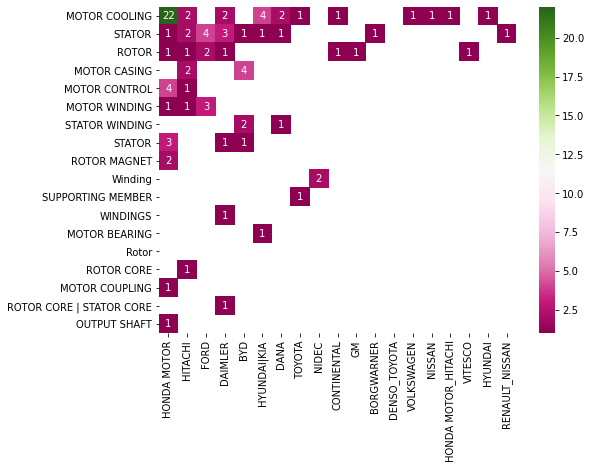

In [144]:
import seaborn as sns
sns.heatmap(data, annot=True,cmap="PiYG")
fig = plt.gcf()
fig.set_size_inches(8, 6)

In [146]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


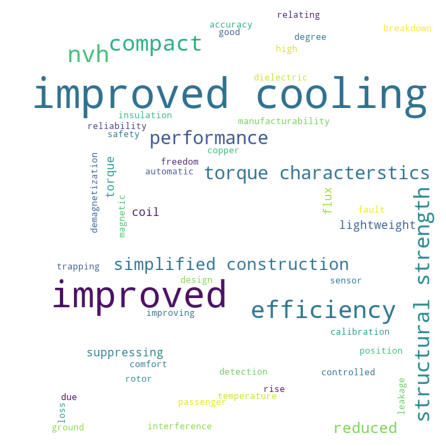

In [149]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df['Impact/Benefit']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [150]:
df.head()

,Fam. No.,Publication no,Current assignees,Player Type,XX Rating,Sub-component,Uniqueness,Impact/Benefit,AC/DC Motor,Phase,...,Motor Position,Family legal status,Geography Count,Cit Count,Claim Count,Priority Country,Overall Rating,Inventors,Earliest priority date,Application dates
0,1,Reference9,BYD,OEM,5,MOTOR COOLING,Oil-cooled cooling system | Spraying device,Improved cooling | Compact,NaN,NaN,...,NaN,GRANTED,1,0,1,CN,3.20,WANG JIANXIN\nZOU XIAOSONG\nFANG ZHAOXIANG,2019-04-15,2019-04-15
1,2,Reference10,BYD,OEM,5,MOTOR CASING,Water-cooled cooling device,Compact,NaN,NaN,...,NaN,PENDING,1,5,1,CN,2.85,WANG JIANXIN\nZOU XIAOSONG\nFANG ZHAOXIANG,2019-04-15,2019-04-15
2,3,Reference330,NIDEC,Suplier,5,Winding,Hairpin windings,Improved Cooling,AC,NaN,...,NaN,GRANTED,2,5,1,FR,3.20,LENOIR ROMARIC ([FR])\nBONNET VINCENT ([FR]),2019-10-31,2020-10-14
3,4,Reference12,BYD,OEM,4,MOTOR CASING,Silencing spaces,NVH | Improved Structural Strength,NaN,NaN,...,NaN,PENDING,1,6,1,CN,3.05,HUA XIAOCONG,2019-07-16,2019-07-16
4,5,Reference34,DAIMLER,OEM,4,STATOR,Cooling channels,Improved cooling,NaN,NaN,...,NaN,LAPSED,1,4,1,DE,2.70,SCHULZE TORBEN ([DE]),2018-08-08,2018-08-08
